In [3]:
# Importing files
from nupack import * # imports nupack
import pandas as pd # imports pandas
import numpy as np
import matplotlib.pyplot as plt # imports plotting functions
import re
import random
import csv

In [9]:
# Strands 
yeDuanPrimer = "AGCAGCACAGAGGTCAGATG" #5'-3'

# Constants
nucleicAcid = 'DNA'
temperature = 37
ionNa = 0.100 #link recommended: 137mM aka 0.137 molar, Nupack boundaries molar [0.05, 1.1] molar
ionMg = 0.002 #link recommended: 1mM aka 0.001 molar, Nupack boundaries molar [0.0, 0.2] molar
concentration = 5e-7 # In molar (0.5 uM)
sizeMax = 2 # max size for complexes 

# Physical model
my_model = Model(material=nucleicAcid, celsius=temperature, sodium=ionNa, magnesium=ionMg) 

In [52]:
def gcContents(seq):
    ''' Function called gcContents finds gc fraction of the sequence 
    Calculates the total G's and C's in the string
    Parameters:     seq                 string of oligonucleotides 
    Returns:        counter/len(seq)    decimal fraction
    '''
    counter = seq.count("G")+seq.count("C")
    if len(seq) > 0:
        gC = counter/len(seq)
    return gC

def randomSeq(base, maxLen, minLen):
    ''' Function called randSeq creates a random oligonucleotide sequence
    Takes the parameter 'bases' and randomizes it
    Parameters:     bases               bases of nucleotides
                    max                 Maximum sequence length
                    min                 Minimum sequence length
    Returns:        seq                 Oligonucleotide sequence
    '''
    seq = ""
    counter = range(random.randint(minLen,maxLen))
    for i in counter:
        seq = "".join([random.choice(base) for i in counter]) 
    return seq

def generateSequences (bases, minGC, maxGC, minLen, maxLen, lenList, seqList, limit, subject):
    ''' generateSequences generates x amount of random oligonucleotide sequences
    that satisfys user's GC content and sequence length range 
    Parameters:     bases               bases of nucleotides
                    minGC               Minimum GC content
                    maxGC               Maximum GC content
                    maxLen              Maximum sequence length
                    minLen              Minimum sequence length
                    lenList             List to store sequnece lengths
                    seqList             List to store sequences
                    limit               Number of sequences to generate
                    subject             What the sequences are for
    '''
    for i in range(limit):
        gC = 0
        while gC > maxGC or gC < minGC:
            sequence = randomSeq(bases, maxLen, minLen)
            gC = gcContents(sequence)
        seqList.append(sequence)
        lenList.append(len(sequence))
    print(f"Completed generating {len(seqList)} {subject} sequences")

def packagingData(data, seq, strandList, mfeList):
    ''' packagingData sorts data to specific lists 
    Parameters:     data                Unfiltered (raw) data 
                    seq                 Oligonucleotide sequence
                    strandList          Lists to store seq
                    mfeList             Lists to store minimum free energy
    '''
    # data: model, strand name, pFunc, gibbs, mfe, none, pairs
    if seq != None:
        strandList.append(seq)
    mfeList.append(next((energy for structure, energy, stackE in data[8]), None))


def graphingConcentrationABC(concList, index, titleName, labels):
    ''' graphingConcentration3Strand graphs 3 strand data 
    Parameters:     concList            List of concentrations 
                    index               Sequence Pair index
    Returns:        total               Lists of the sum of concentrations
    '''
    concList = [np.array(conc) for conc in concList]
    a, aa, aaa, aab, aac, ab, abb, abc, ac, acb, acc,b, bb, bbb, bbc, bc, bcc, c, cc, ccc = concList
    total = [sum(complex) for complex in zip(*concList)]
    colors =    ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#999999",
                "#000000", "#FF0000", "#8E44AD", "#1F77B4", "#D62728", "#9467BD", "#2CA02C", "#FF7F0E",
                "#6B8E23", "#C71585", "#20B2AA", "#FFD700"]
    plt.figure(figsize=(15,5))
    barWidth = 0.15
    xAxis = np.arange(len(index))
    offset1 = xAxis-barWidth
    offset2 = xAxis
    offset3 = xAxis+barWidth

    # Benefitial 
    plt.bar(offset1, ac/total, barWidth, label = labels[8], color = colors[11])
    bar1 = ac/total
    plt.bar(offset1, b/total, barWidth, label = labels[11], bottom = bar1, color = colors[1])
    bar1 += b/total

    # Neutral
    plt.bar(offset2, a/total, barWidth, label = labels[0], color = colors[0])
    bar2 = a/total
    plt.bar(offset2, c/total, barWidth, label = labels[17], bottom = bar2, color = colors[2])
    bar2 += c/total

    # Detrimental
    plt.bar(offset3, aa/total, barWidth, label = labels[1], color = colors[6])
    bar3 = aa/total
    plt.bar(offset3, aaa/total, barWidth, label = labels[2], bottom = bar3, color = colors[7])
    bar3 += aaa/total
    plt.bar(offset3, aab/total, barWidth, label = labels[3], bottom = bar3, color = colors[8])
    bar3 += aab/total
    plt.bar(offset3, aac/total, barWidth, label = labels[4], bottom = bar3, color = colors[9])
    bar3 += aac/total
    plt.bar(offset3, ab/total, barWidth, label = labels[5], bottom = bar3, color = colors[3])
    bar3 += ab/total
    plt.bar(offset3, abb/total, barWidth, label = labels[6], bottom = bar3, color = colors[10])
    bar3 += abb/total
    plt.bar(offset3, acb/total, barWidth, label = labels[9], bottom = bar3, color = colors[12])
    bar3 += acb/total
    plt.bar(offset3, acc/total, barWidth, label = labels[10], bottom = bar3, color = colors[13])
    bar3 += acc/total
    plt.bar(offset3, bb/total, barWidth, label = labels[12], bottom = bar3, color = colors[14])
    bar3 += bb/total
    plt.bar(offset3, bbb/total, barWidth, label = labels[13], bottom = bar3, color = colors[15])
    bar3 += bbb/total
    plt.bar(offset3, bbc/total, barWidth, label = labels[14], bottom = bar3, color = colors[16])
    bar3 += bbc/total
    plt.bar(offset3, bcc/total, barWidth, label = labels[16], bottom = bar3, color = colors[17])
    bar3 += bcc/total
    plt.bar(offset3, cc/total, barWidth, label = labels[18], bottom = bar3, color = colors[18])
    bar3 += cc/total
    plt.bar(offset3, ccc/total, barWidth, label = labels[19], bottom = bar3, color = colors[19])
    bar3 += ccc/total
    plt.bar(offset3, abc/total, barWidth, label = labels[7], bottom = bar3, color = colors[4])
    bar3 += abc/total
    plt.bar(offset3, bc/total, barWidth, label = labels[15], bottom = bar3, color = colors[5])
    bar3 += bc/total
    

    plt.legend(loc='right', bbox_to_anchor=(1.2,0.5))
    plt.title(f"{titleName}")
    if len(index) <= 300:
        plt.xticks(xAxis, index, rotation = -90)
    plt.ylabel('Probabilty')
    plt.xlabel('Sequence Index')
    plt.ylim(0,1)

In [6]:
# Generating primer sequences
# Lists
fwdPrimerList, revPrimerList = [], []
fwdPrimerLength, revPrimerLength = [], []

# Constants
nitrogenousBase = ("A","T","C","G")
gcMax = 0.70 # anything above 0.7 is not ideal
gcMin = 0.30 # less than 0.3 is not ideal

# Main
trigger = False 
if trigger == True: # Saved 11/9 7:35pm
    generateSequences(nitrogenousBase, gcMin, gcMax, 32, 32, fwdPrimerLength, fwdPrimerList, 20000, "Forward Primer")
    generateSequences(nitrogenousBase, gcMin, gcMax, 12, 12, revPrimerLength, revPrimerList, 20000, "Reverse Primer")
    probeIndex = range(20000)
    
    ############################################ CHANGE THIS EVERYTIME
    #csvName = "Primer Segments Mark 9.csv"
    ############################################
    csvFile = open(csvName, 'wt', newline='') # creating file if it doesnt exist or overwrites this if it exists BE CAREFUL
    writer = csv.writer(csvFile)    
    try:
        writer = csv.writer(csvFile)
        writer.writerow(('Index', 'Foward Primer', 'Reverse Primer'))
        for i in range(len(fwdPrimerList)):
            writer.writerow((i, fwdPrimerList[i], revPrimerList[i]))
    finally:
        csvFile.close()
    print(f"Completed saving {len(fwdPrimerList)} primer pairs into '{csvName}'.")

Completed generating 20000 Forward Primer sequences
Completed generating 20000 Reverse Primer sequences
Completed saving 20000 primer pairs into fPrimer Segments Mark 9.csv.


In [133]:
# Processing primers
# Lists
strandA, strandAA, strandB, strandBB, strandAB = [], [], [], [], [] # strands
gibbsEnergyA, gibbsEnergyAA, gibbsEnergyB, gibbsEnergyBB, gibbsEnergyAB = [], [], [], [], [] # gibbs free energy
mfeA, mfeAA, mfeB, mfeBB, mfeAB = [], [], [], [], [] # minimal free energy
a, aa, aaa, aab, ab, abb= [],[],[],[],[],[] # concentration
b, bb, bbb = [],[],[]
totalConc = []
concList = [a, aa, aaa, aab, ab, abb, b, bb, bbb]

# Collecting Data
for i in range(len(probeIndex)):
    A = Strand(fwdPrimerList[i], material=nucleicAcid, name = 'A') # fwd primer sequence
    B = Strand(revPrimerList[i]+yeDuanPrimer, material=nucleicAcid, name = 'B') # rev primer sequence
    
    t1 = Tube(strands= {A: concentration, B: concentration}, complexes=SetSpec(max_size=3), name='t1')
    my_results = tube_analysis(tubes=[t1], model= my_model, compute=['mfe'])
    
    packagingData(my_results['(A)'], fwdPrimerList[i], strandA, mfeA) # Collecting Strand A data
    packagingData(my_results['(A+A)'], None, strandAA, mfeAA) # Collecting Strand A-A data
    packagingData(my_results['(B)'], revPrimerList[i]+yeDuanPrimer, strandB, mfeB) # Collecting Strand B data
    packagingData(my_results['(B+B)'], None, strandBB, mfeBB) # Collecting Strand B-B data
    packagingData(my_results['(A+B)'], None, strandAB, mfeAB) # Collecting Strand A-B data

    complex_results = complex_analysis(complexes=t1,model=my_model, compute=['pfunc'])
    complex_results2 = complex_concentrations(tube=t1,data=complex_results)
    [concList[i].append(conc) for i, conc in enumerate(complex_results2.tubes[t1].complex_concentrations.values())]
    totalConc.append(sum(complex_results2.tubes[t1].complex_concentrations.values()))

# Combining data for analysis
combinedData = np.column_stack((strandA, strandB,
                                mfeA, mfeB, mfeAA, mfeAB, mfeBB,
                                probeIndex, fwdPrimerLength, revPrimerLength,
                                a, aa, aaa, aab, ab, abb,
                                b, bb, bbb, totalConc))

# Changing matrix to dataframe
labels = ['Aptamer (A)','Blocker (B)',
          'MFE A', 'MFE B', 'MFE AA', 'MFE AB', 'MFE BB',
          'Index', 'Length of A', 'Length of B',
          'Forward Primer (A)', 'AA', 'AAA', 'AAB', 'AB', 'ABB', 
          'Reverse Primer (B)', 'BB', 'BBB', 'Total Concentration']
labeledCombinedData = pd.DataFrame(combinedData, columns=labels)
print(f"Completed processing {len(fwdPrimerList)} primer pairs data.")

#labeledCombinedData.to_excel("Analysized Primers Mark 10.xlsx") #saved Mark10 11/10 2:03 PM

Completed processing 20000 primer pairs data.


In [135]:
# Filtering by gibbs energy 
# List
filteredGibbsData = []

# Constants
minGibbs = -4 # minimum accepted Gibbs Free Energy 
maxGibbs = -0 # maximum accepted Gibbs Free Energy

# Main
gPattern = re.compile(r'^#.{0.2}(GGG)') 
consecutiveBP = re.compile(r'(GGGGG|CCCCC|AAAAA|TTTTT)')
for i in range(len(probeIndex)):
    primerA = labeledCombinedData.iloc[i,0]
    primerB = labeledCombinedData.iloc[i,1]
    mfeAData = labeledCombinedData.iloc[i,2]
    mfeBData = labeledCombinedData.iloc[i,3]

    if gPattern.search(primerA[:5]) or gPattern.search(primerB[:5]):
        continue
    if consecutiveBP.search(primerA) or consecutiveBP.search(primerB):
        continue

    if minGibbs <= float(mfeAData) <= maxGibbs and minGibbs <= float(mfeBData) <= maxGibbs:
        rowData = labeledCombinedData.iloc[i].tolist()
        filteredGibbsData.append(rowData)

labeledFilteredGibbsData = pd.DataFrame(filteredGibbsData, columns=labeledCombinedData.columns)
filteredGibbsData = np.column_stack(labeledFilteredGibbsData.values.T)
print(f"Number of Sequence Pairs: {len(labeledFilteredGibbsData)}")

Number of Sequence Pairs: 16242


In [137]:
# Filtering by Primer concentration (size 2)
# Main
dataA = labeledFilteredGibbsData.iloc[:,10].astype(float)
dataB = labeledFilteredGibbsData.iloc[:,16].astype(float)
dataTotal = labeledFilteredGibbsData.iloc[:,19].astype(float)
concFilter = (dataA + dataB)/dataTotal > 0.999

filteredConcData = np.delete(labeledFilteredGibbsData.to_numpy(), np.where(~concFilter), axis=0)
labeledFilteredConcData = pd.DataFrame(filteredConcData, columns=labeledFilteredGibbsData.columns)
print(f"Number of Sequence Pairs that are marjority A and B complex: {len(labeledFilteredConcData)}")

Number of Sequence Pairs that are marjority A and B complex: 7937


In [ ]:
# Lists
a, aa, aaa, aab, aac, ab, abb, abc, ac, acb, acc = [], [],[],[],[], [], [],[],[],[],[]
b, bb, bbb, bbc, bc, bcc = [],[],[],[],[],[]
c, cc, ccc, totalABCapConc = [], [], [], []
concList3 = [a, aa, aaa, aab, aac, ab, abb, abc, ac, acb, acc,b, bb, bbb, bbc, bc, bcc, c, cc, ccc]

for i in range(len(filteredConcData)):
    A = Strand(filteredConcData[i,0], material=nucleicAcid, name='A') # forward primer
    B = Strand(filteredConcData[i,1], material=nucleicAcid, name='B') # reverse primer
    C = Strand("AGCAGCACAGAGGTCAGATGCAATAAGCGATGCGCCCTCGCCTGGGGGCCTAGTCCTCTCCTATGCGTGCTACCGTGAA", material=nucleicAcid, name='C') # CAP 
    
    # Specify complexes up to size 3
    t1 = Tube(strands={A: concentration, B: concentration, C: concentration},
              complexes=SetSpec(include=[(A, B, C)], max_size=3), name='t1')
    my_results = tube_analysis(tubes=[t1], model=my_model)
    complex_results = complex_analysis(complexes=t1,model=my_model, compute=['pfunc'])
    complex_results2 = complex_concentrations(tube=t1,data=complex_results)
    [concList3[i].append(conc) for i, conc in enumerate(complex_results2.tubes[t1].complex_concentrations.values())]
    totalABCapConc.append(sum(complex_results2.tubes[t1].complex_concentrations.values()))
print(f"Completed processing {len(filteredConcData)} primer and cap data.")

testABC = np.column_stack((filteredConcData[:,0], filteredConcData[:,1], 
                            a, aa, aaa, aab, aac, ab, abb, abc, ac, acb, acc,
                            b, bb, bbb, bbc, bc, bcc, c, cc, ccc, 
                            totalABCapConc, filteredConcData[:,7]))

# Changing matrix to dataframe
labels =['Forward Primer (A)','Reverse Primer (B)',
         'A', 'AA', 'AAA', 'AAB', 'AAC', 'AB', 'ABB', 'ABC', 'AC', 'ACB', 'ACC',
         'B', 'BB', 'BBB', 'BBC', 'BC', 'BCC', 'C', 'CC', 'CCC',
         'Total Concentration', 'Index']
labeledCombinedDataABCTesting = pd.DataFrame(testABC, columns=labels)

In [147]:
# Filtering by Primer concentration (size 3)
# Main
dataAC = labeledCombinedDataABCTesting.iloc[:,10].astype(float)
dataB = labeledCombinedDataABCTesting.iloc[:,13].astype(float)
dataTotal = labeledCombinedDataABCTesting.iloc[:,22].astype(float)
concFilter2 = (dataAC + dataB)/dataTotal > 0.70

filteredConcData2 = np.delete(labeledCombinedDataABCTesting.to_numpy(), np.where(~concFilter2), axis=0)
labeledFilteredConcData2 = pd.DataFrame(filteredConcData2, columns=labeledCombinedDataABCTesting.columns)
print(f"Number of Sequence Pairs that are marjority A and B complex: {len(labeledFilteredConcData2)}")
#labeledFilteredConcData2.to_excel("Final Primers Mark 10.xlsx") #saved Mark10 11/10 4:29 PM

Number of Sequence Pairs that are marjority A and B complex: 5


Summary
Completed processing 20000 primer pairs data.
Number of Sequence Pairs after MFE filter: 16242
Number of Sequence Pairs that are marjority A and B complex: 7937
Completed processing 7937 primers and cap sequences.
Number of Sequence Pairs that are marjority AC and B complex: 5


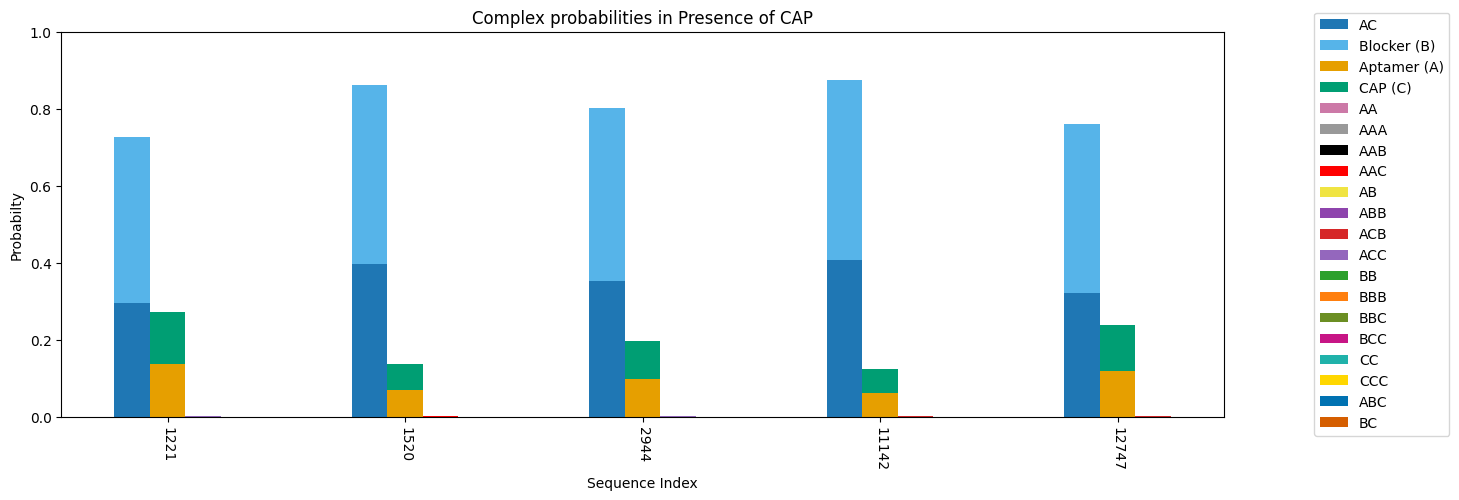

In [150]:
# Graphing concentrations of final primer pairs in the presence of CAP
npFilteredConcData2 = np.array(filteredConcData2)
a, aa, aaa, aab, aac, ab, abb, abc, ac, acb, acc,b, bb, bbb, bbc, bc, bcc, c, cc, ccc, total = npFilteredConcData2[:,2:23].T
concList4 = [a, aa, aaa, aab, aac, ab, abb, abc, ac, acb, acc,b, bb, bbb, bbc, bc, bcc, c, cc, ccc]

graphingLabels = ['Forward Primer (A)', 'AA', 'AAA', 'AAB', 'AAC', 'AB', 'ABB', 'ABC', 'AC', 'ACB', 'ACC',
                  'Reverse Primer (B)', 'BB', 'BBB', 'BBC', 'BC', 'BCC',
                  'CAP (C)', 'CC', 'CCC',]
graphingConcentrationABC(concList4, filteredConcData2[:,23], "Complex probabilities in Presence of CAP", graphingLabels)

# Summary 
print("Summary")
print(f"Completed processing {len(fwdPrimerList)} primer pairs data.")
print(f"Number of Sequence Pairs after MFE filter: {len(labeledFilteredGibbsData)}")
print(f"Number of Sequence Pairs that are marjority A and B complex: {len(labeledFilteredConcData)}")
print(f"Completed processing {len(filteredConcData)} primers and cap sequences.")
print(f"Number of Sequence Pairs that are marjority AC and B complex: {len(labeledFilteredConcData2)}")